In [121]:
import torch
from torch import (optim, nn)

from torch.utils.data import (
    DataLoader,
    TensorDataset,
    random_split
)

import numpy as np

# User-defined classes
from utils.base import (
    LogisticRegression,
    Trainer
)

# User-defined functions
from utils.preprocess import clusters

# Plotting
import matplotlib.pyplot as plt

plt.style.use("seaborn-v0_8")
plt.rcParams["font.family"] = "monospace"

In [122]:
# Constants
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
DTYPE = torch.float32
BATCH_SIZE = 32
NUM_EPOCHS = 20
SIZE = 100
GENERATOR = torch.Generator().manual_seed(42)

print(f"Device has ben set to: {torch.cuda.get_device_properties(DEVICE).name}")

Device has ben set to: NVIDIA GeForce RTX 4060 Laptop GPU


In [123]:
X, y = clusters(SIZE, std0 = 1.3, std1 = 1.6)

In [124]:
print("Generated X:", X, "\nGenerated y:", y, sep='\n')
print("\nShape of X: ", X.shape, "\nShape of y: ", y.shape, sep='\n')

Generated X:
tensor([[-1.0346, -4.5337],
        [-4.3702, -3.4476],
        [-1.3194, -3.6768],
        [-2.8171, -4.1018],
        [-1.4428, -3.1138],
        [-2.7814, -4.7821],
        [-3.0980, -2.7594],
        [-0.4207, -1.4774],
        [-0.6824, -1.7187],
        [-4.2608, -2.8071],
        [-1.8236, -5.1350],
        [-3.6784, -4.0985],
        [-2.7962, -3.1422],
        [-0.3163, -4.5832],
        [-4.0963, -1.6371],
        [-2.6592, -2.1142],
        [-3.3208, -5.3149],
        [-2.7732, -5.3267],
        [-2.9051, -2.3567],
        [-1.9433, -2.8606],
        [-2.0887, -3.9201],
        [-3.5857, -3.2091],
        [-2.7056, -2.3464],
        [-6.4044, -5.4631],
        [-3.7512, -2.8412],
        [-4.8342, -2.5614],
        [-3.9712, -3.5932],
        [-4.2649,  0.5436],
        [-3.1114, -3.0137],
        [-3.1116, -3.1565],
        [-2.0531, -4.0439],
        [-2.8413, -4.3681],
        [-1.2630, -3.1225],
        [-1.0166, -1.7985],
        [-1.9949, -1.6910],
       

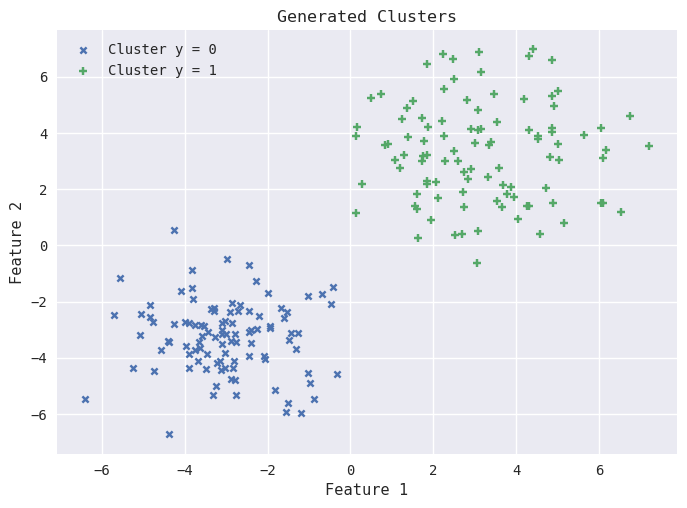

In [125]:
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], marker='x', label='Cluster y = 0', s=20)
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], marker='+', label='Cluster y = 1', s=40)
plt.legend()
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Generated Clusters')
plt.show()

In [126]:
Model = LogisticRegression(in_dims=2).to(DEVICE)

In [127]:
Data = TensorDataset(X, y)
Data.tensors

(tensor([[-1.0346, -4.5337],
         [-4.3702, -3.4476],
         [-1.3194, -3.6768],
         [-2.8171, -4.1018],
         [-1.4428, -3.1138],
         [-2.7814, -4.7821],
         [-3.0980, -2.7594],
         [-0.4207, -1.4774],
         [-0.6824, -1.7187],
         [-4.2608, -2.8071],
         [-1.8236, -5.1350],
         [-3.6784, -4.0985],
         [-2.7962, -3.1422],
         [-0.3163, -4.5832],
         [-4.0963, -1.6371],
         [-2.6592, -2.1142],
         [-3.3208, -5.3149],
         [-2.7732, -5.3267],
         [-2.9051, -2.3567],
         [-1.9433, -2.8606],
         [-2.0887, -3.9201],
         [-3.5857, -3.2091],
         [-2.7056, -2.3464],
         [-6.4044, -5.4631],
         [-3.7512, -2.8412],
         [-4.8342, -2.5614],
         [-3.9712, -3.5932],
         [-4.2649,  0.5436],
         [-3.1114, -3.0137],
         [-3.1116, -3.1565],
         [-2.0531, -4.0439],
         [-2.8413, -4.3681],
         [-1.2630, -3.1225],
         [-1.0166, -1.7985],
         [-1.9

In [128]:
trainData, valData = random_split(Data, (0.8, 0.2), generator=GENERATOR)

trainLoader = DataLoader(trainData, batch_size=BATCH_SIZE, generator=GENERATOR, shuffle=True)
valLoader = DataLoader(valData, batch_size=BATCH_SIZE, generator=GENERATOR, shuffle=True)

In [129]:
trainer = Trainer(
    Model,
    trainLoader,
    valLoader,
    optimizer=optim.SGD(Model.parameters(), lr=.1),
    criterion=nn.BCELoss(reduction='mean'),        # Binary Cross-entropy Loss (For classification)
    device=DEVICE
)

In [130]:
train_loss, val_loss = trainer.train(num_epochs=NUM_EPOCHS)

	Epoch 1 | Weights: tensor([-0.2324,  0.0454], device='cuda:0')
	Epoch 1 | Bias: tensor([-0.2438], device='cuda:0')
	Epoch 1 | Weights: tensor([-0.0292,  0.2696], device='cuda:0')
	Epoch 1 | Bias: tensor([-0.2476], device='cuda:0')
	Epoch 1 | Weights: tensor([0.0726, 0.3653], device='cuda:0')
	Epoch 1 | Bias: tensor([-0.2316], device='cuda:0')
	Epoch 1 | Weights: tensor([0.1263, 0.4222], device='cuda:0')
	Epoch 1 | Bias: tensor([-0.2318], device='cuda:0')
	Epoch 1 | Weights: tensor([0.1755, 0.4603], device='cuda:0')
	Epoch 1 | Bias: tensor([-0.2338], device='cuda:0')
Epoch 1/20 | Loss: 0.8848
	| Validation Loss: 0.1411

	Epoch 2 | Weights: tensor([0.2178, 0.4932], device='cuda:0')
	Epoch 2 | Bias: tensor([-0.2253], device='cuda:0')
	Epoch 2 | Weights: tensor([0.2460, 0.5181], device='cuda:0')
	Epoch 2 | Bias: tensor([-0.2276], device='cuda:0')
	Epoch 2 | Weights: tensor([0.2715, 0.5420], device='cuda:0')
	Epoch 2 | Bias: tensor([-0.2276], device='cuda:0')
	Epoch 2 | Weights: tensor([0.

In [131]:
print("Train Loss:", train_loss, "\nValidation Loss:", val_loss, sep='\n')

Train Loss:
{0: 0.8847593426704407, 1: 0.11738069951534272, 2: 0.07320697605609894, 3: 0.055225351452827455, 4: 0.04507837481796741, 5: 0.03843456171452999, 6: 0.03374049142003059, 7: 0.030238721519708633, 8: 0.027490952983498573, 9: 0.025278226658701896, 10: 0.023436959087848663, 11: 0.021895832009613515, 12: 0.02057805061340332, 13: 0.019443619810044766, 14: 0.01843144968152046, 15: 0.01754066105931997, 16: 0.016760420985519886, 17: 0.016042814031243323, 18: 0.015401092916727066, 19: 0.014824724569916726}

Validation Loss:
{0: 0.14108800888061523, 1: 0.08979019895195961, 2: 0.05741558037698269, 3: 0.03849509172141552, 4: 0.03180086612701416, 5: 0.023530527483671904, 6: 0.03698087204247713, 7: 0.028435594402253628, 8: 0.020228613168001175, 9: 0.019573146477341652, 10: 0.012678647879511118, 11: 0.019959409721195698, 12: 0.02067951811477542, 13: 0.016817533411085606, 14: 0.009163087117485702, 15: 0.011792714707553387, 16: 0.009078075410798192, 17: 0.013862635008990765, 18: 0.01373314950

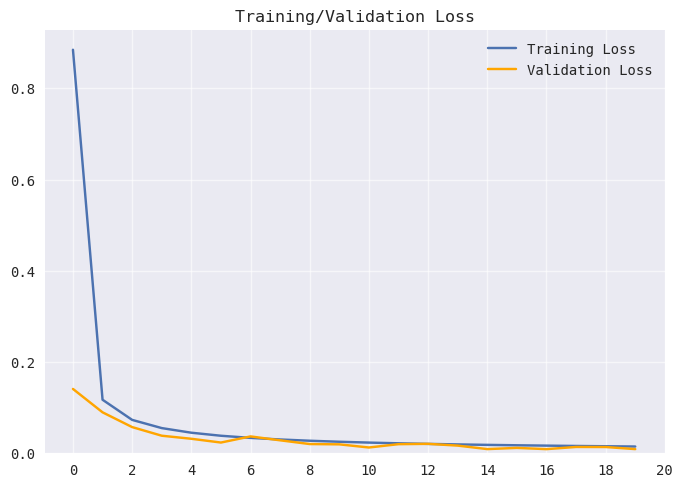

In [132]:
plt.plot(
    train_loss.keys(),
    train_loss.values(),
    label="Training Loss"
);
plt.plot(
    val_loss.keys(),
    val_loss.values(),
    color="orange",
    label="Validation Loss"
);
plt.ylim(bottom=-0);
plt.xticks(np.linspace(0, 20, 11));
plt.grid(True, alpha = .6);
plt.title("Training/Validation Loss");
plt.legend(loc='best');
plt.show()

In [133]:
print(f"Predicted Model Parameters:", "Weights: {}".format(Model.w), "Bias: {}".format(Model.b), sep="\n")

Predicted Model Parameters:
Weights: Parameter containing:
tensor([0.8165, 1.0225], device='cuda:0', requires_grad=True)
Bias: Parameter containing:
tensor([-0.1624], device='cuda:0', requires_grad=True)


In [ ]:
T = torch.linspace(X.min(), X.max(), SIZE, dtype=DTYPE, device=DEVICE).reshape(SIZE, 1)

slope = -Model.w[0] / Model.w[1]
interc = -Model.b / Model.w[1]
boundary = slope * T + interc

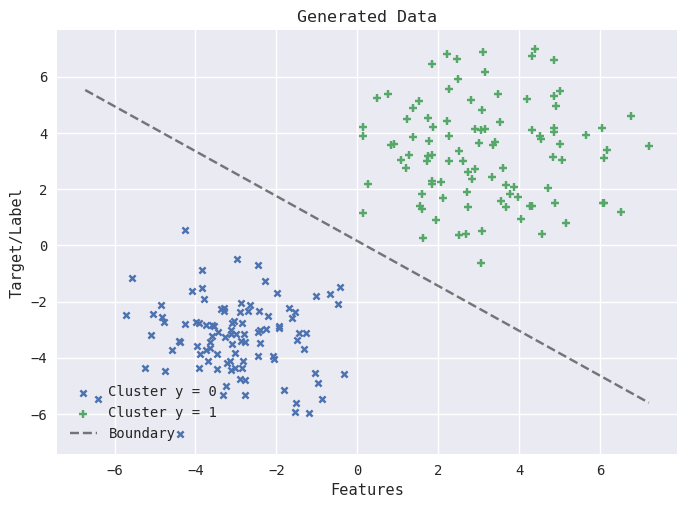

In [141]:
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], marker='x', label='Cluster y = 0', s=20)
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], marker='+', label='Cluster y = 1', s=40)
# Decision Boundary
plt.plot(
    T.detach().cpu(),
    boundary.detach().cpu(),
    alpha=.5,
    color='black',
    linestyle='--',
    label="Boundary"
);

plt.xlabel("Features");
plt.ylabel("Target/Label");
plt.title("Generated Data");
plt.legend(loc='best');
plt.show();